<a href="https://colab.research.google.com/github/SampannaMishra/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/almabetter/Capstone project/Copy of SeoulBikeData.csv',encoding= 'unicode_escape')
data

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [58]:
data.shape

(8760, 14)

## **Exploratory Data Analysis**

In [59]:
# checking for null values
data.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [60]:
data['Date'] = pd.to_datetime(data['Date'])
data['Date']

0      2017-01-12
1      2017-01-12
2      2017-01-12
3      2017-01-12
4      2017-01-12
          ...    
8755   2018-11-30
8756   2018-11-30
8757   2018-11-30
8758   2018-11-30
8759   2018-11-30
Name: Date, Length: 8760, dtype: datetime64[ns]

In [61]:
data['year'] = data['Date'].dt.year
data['month_short'] = data['Date'].dt.month_name().str[:3]
data['day'] = data['Date'].dt.day_name()
data

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,year,month_short,day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,Jan,Thursday
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,Jan,Thursday
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,Jan,Thursday
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,Jan,Thursday
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,Jan,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,Nov,Friday
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,Nov,Friday
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,Nov,Friday
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,Nov,Friday


In [62]:
#creating a new column of "weekdays_weekend" and drop the column "Date","day","year"
data['weekday_filter']=data['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
data=data.drop(columns=['Date','day','year'],axis=1)

In [63]:
data.head(5)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month_short,weekday_filter
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Jan,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Jan,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Jan,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Jan,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Jan,0


Since the data contains the information of a year starting from 2017 till 2018 so year column wouldnot be much significant in analysis.It can be dropped

In [64]:
# check data type

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  month_short                8760 non-null   objec

In [65]:
# Changing the datatype
# the columns like Hour , weekday_filter should be category typpe. But here its int64 type. So change it to category datatype
data['Hour'] = data['Hour'].astype('category')
data['weekday_filter'] = data['weekday_filter'].astype('category')

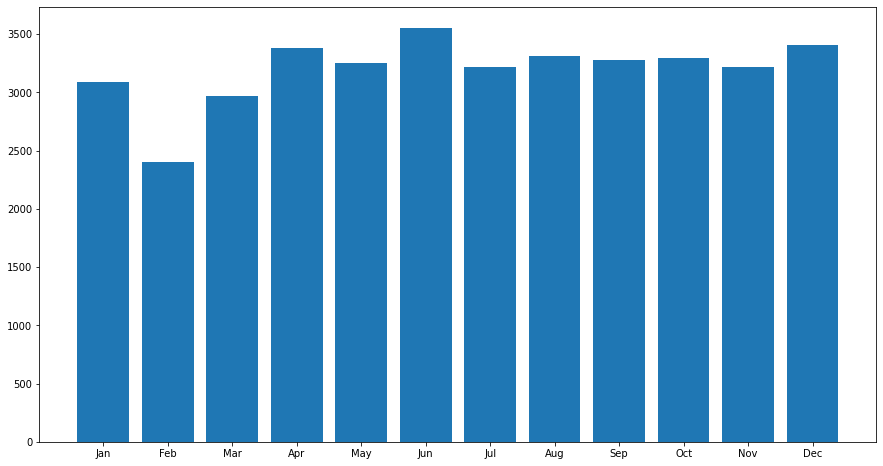

In [66]:
plt.figure(figsize=(15,8))
plt.bar(x='month_short',height='Rented Bike Count',data = data)
plt.show()

June month has the highest rented bike count followed by april and december.

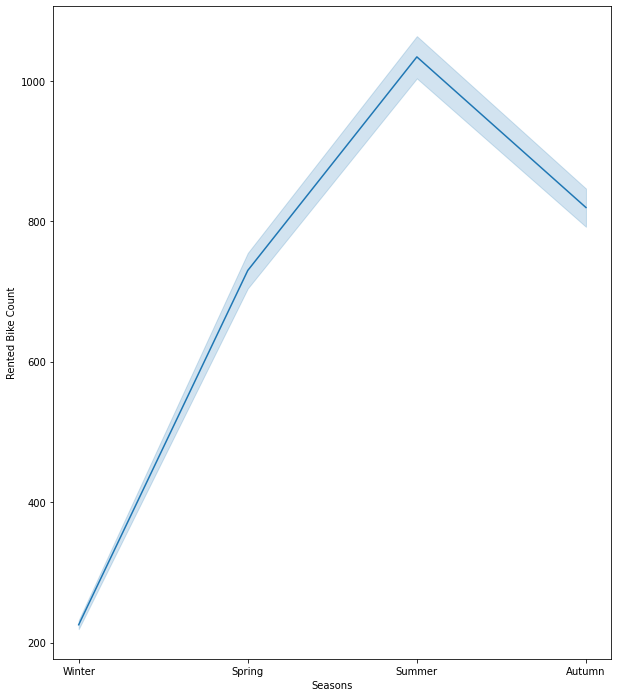

In [14]:
plt.figure(figsize = (10,12))
sns.lineplot(data=data, x="Seasons", y="Rented Bike Count")

Rented Bike Count is higihest in month of Summer and lowest in winter season. This might be because due to harsh weather conditions in winter people dont prefer to travel in bike.

In [15]:
# plt.figure(figsize = (15,15))
# sns.lineplot(data=data, x="Temperature(°C)", y="Rented Bike Count")

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekenday ')]

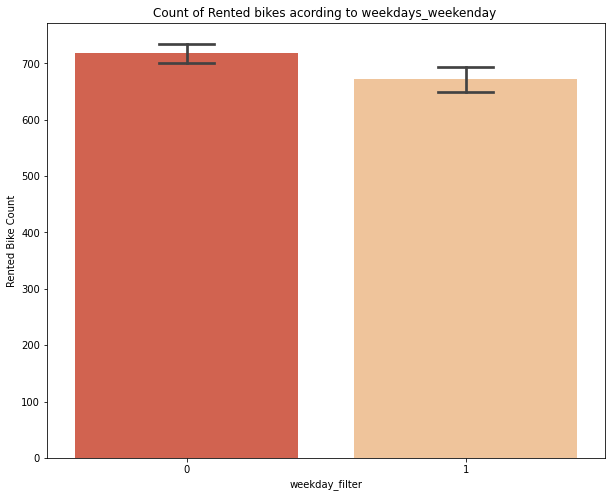

In [16]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=data,x='weekday_filter',y='Rented Bike Count',palette='OrRd_r',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to weekdays_weekenday ')

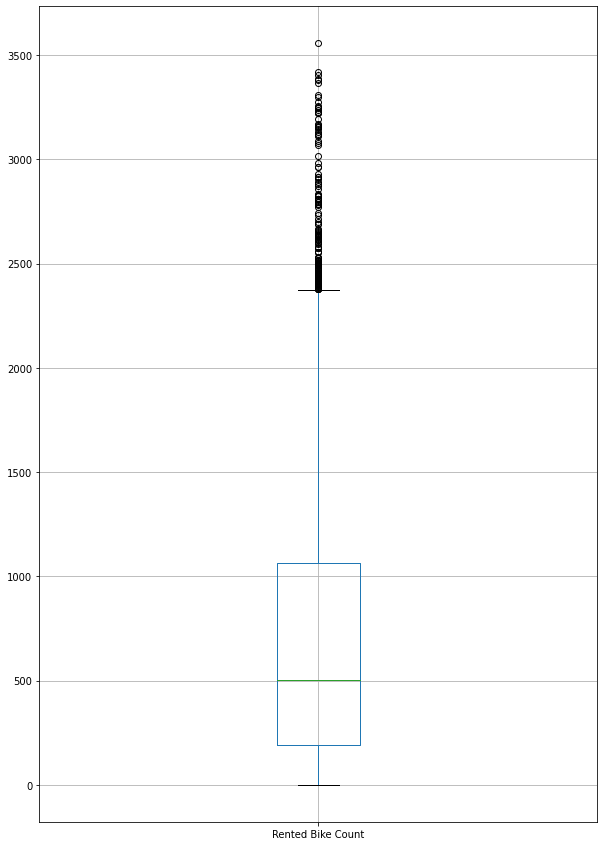

In [17]:
# box plot showing outliers in Rented Bike Count
plt.figure(figsize=(10,15))
data.boxplot(column='Rented Bike Count')
plt.show()

From the above boxplot outliers can be detected in the values. Which should be removed begore performing the regression analysis.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Rented Bike Count')

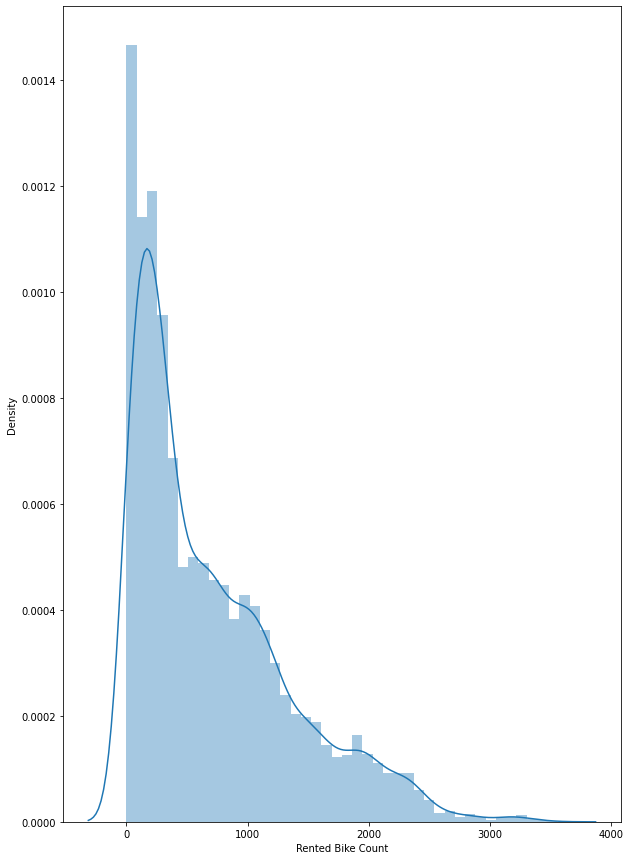

In [18]:
plt.figure(figsize=(10,15))
sns.distplot(x=data['Rented Bike Count'])
plt.xlabel('Rented Bike Count')

'Rented Bike Count' feature values are positively skewed. This should be processed to bring to a normal distribution.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


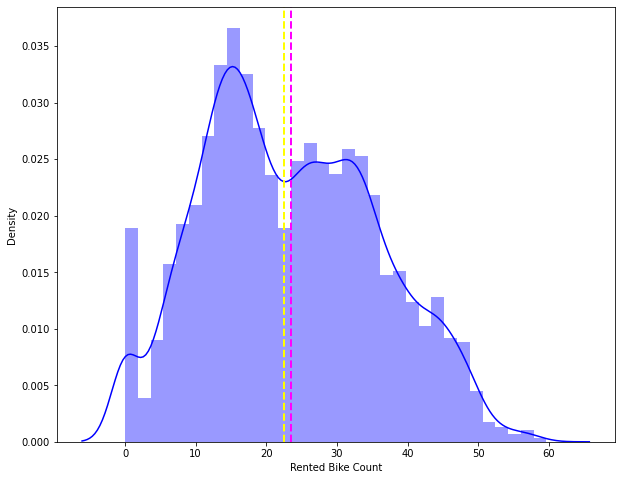

In [19]:
#Applying square root to Rented Bike Count to improve skewness
plt.figure(figsize=(10,8))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(data['Rented Bike Count']), color="b")
ax.axvline(np.sqrt(data['Rented Bike Count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(data['Rented Bike Count']).median(), color='yellow', linestyle='dashed', linewidth=2)

plt.show()

In [21]:
#assign the numerical coulmn to variavle
num_columns=list(data.select_dtypes(['int64','float64']).columns)
num_columns

['Rented Bike Count',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

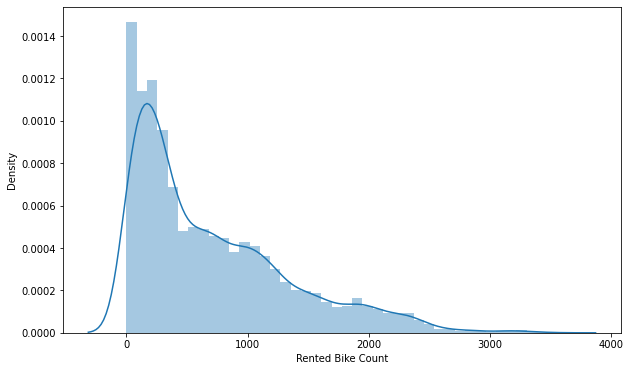

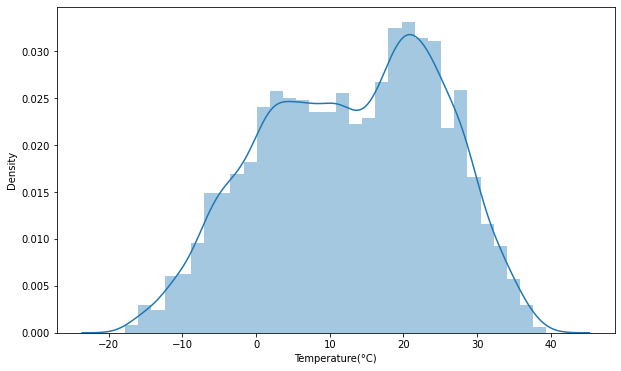

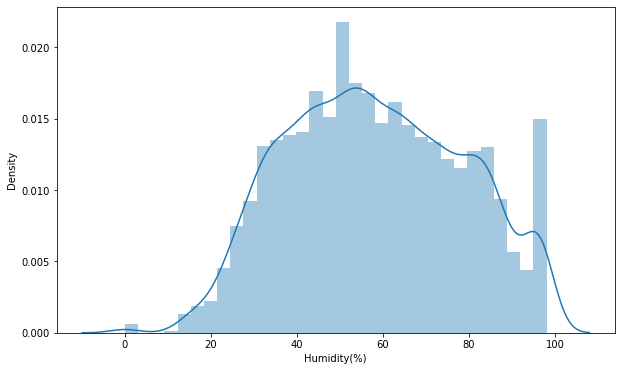

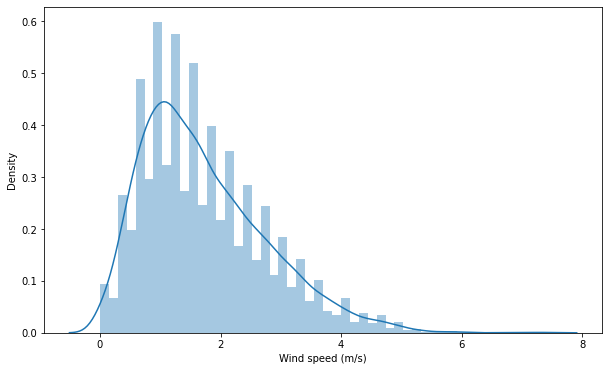

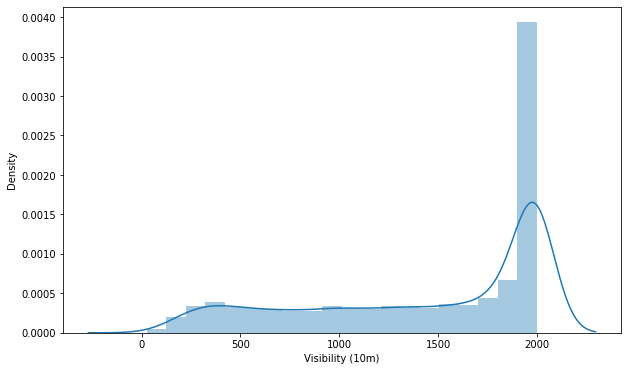

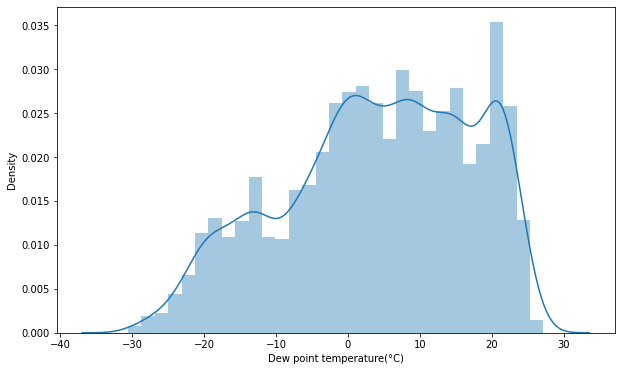

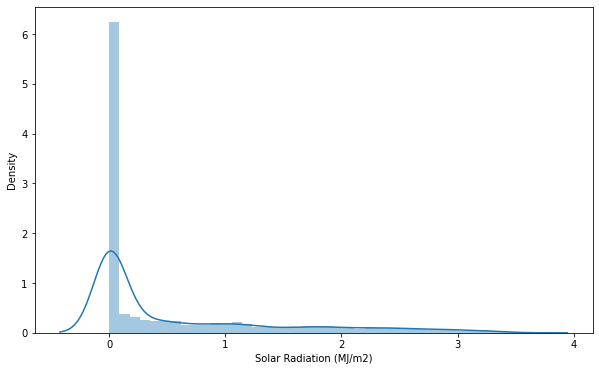

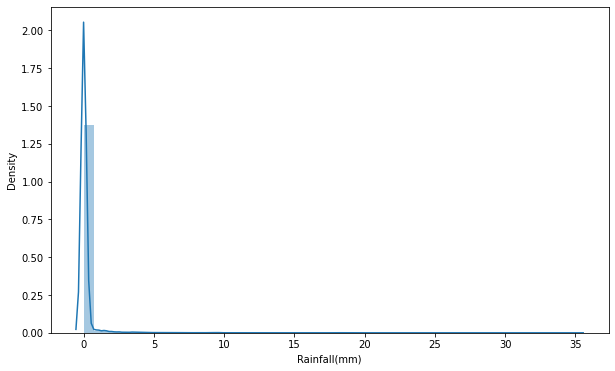

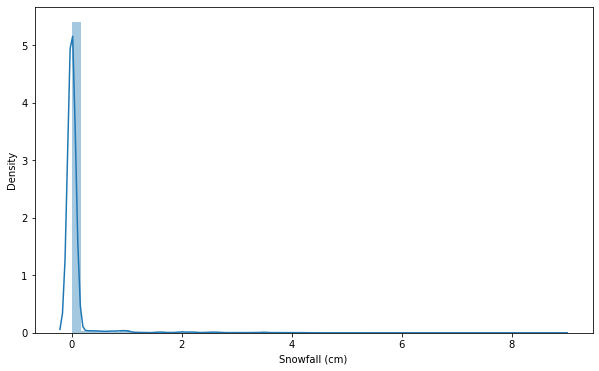

In [22]:
#printing displots to analyze the distribution of all numerical features
for col in num_columns:
  plt.figure(figsize=(10,6))
  sns.distplot(x=data[col])
  plt.xlabel(col)
plt.show()

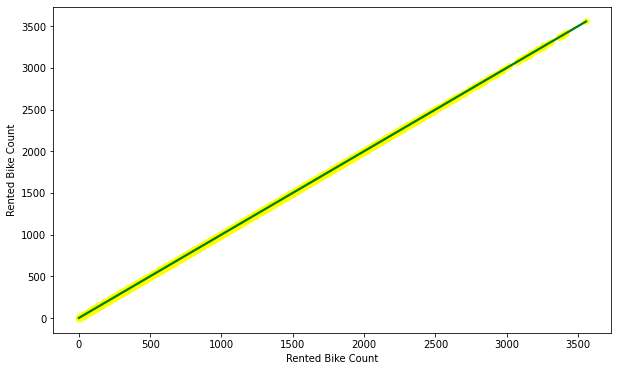

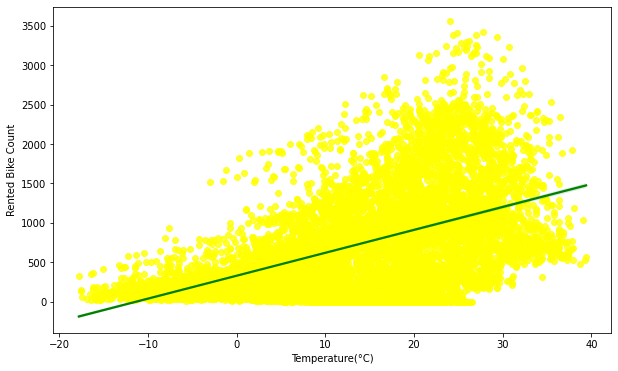

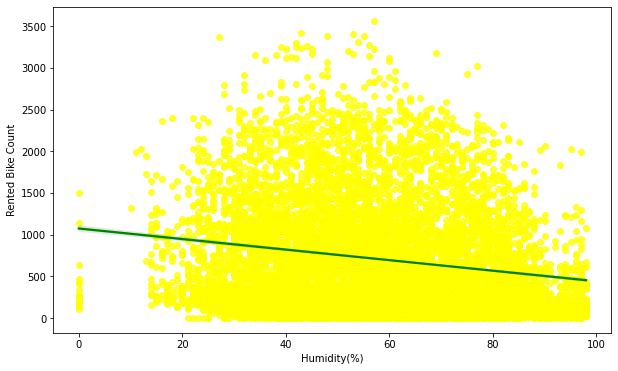

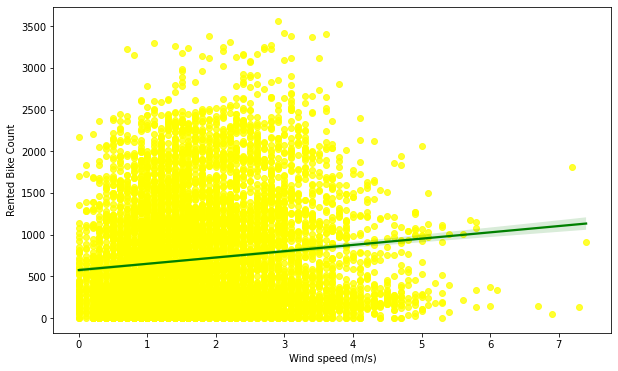

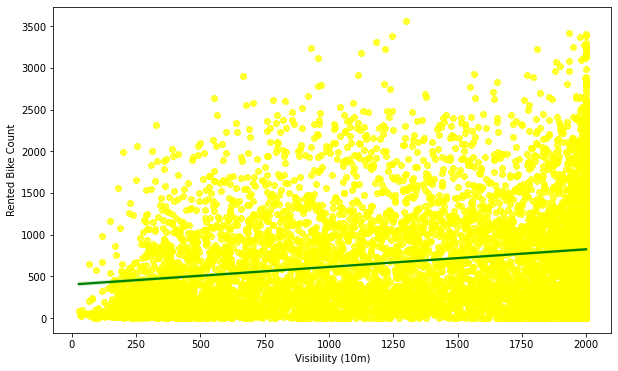

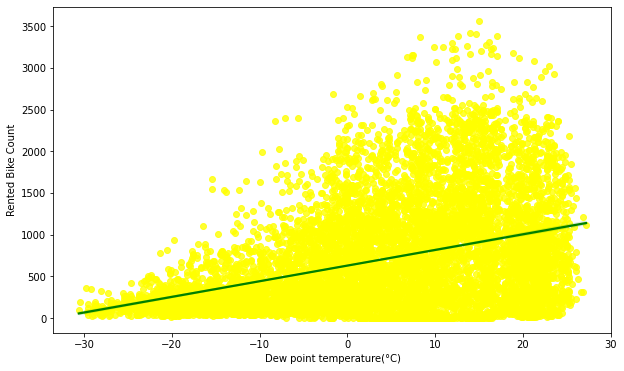

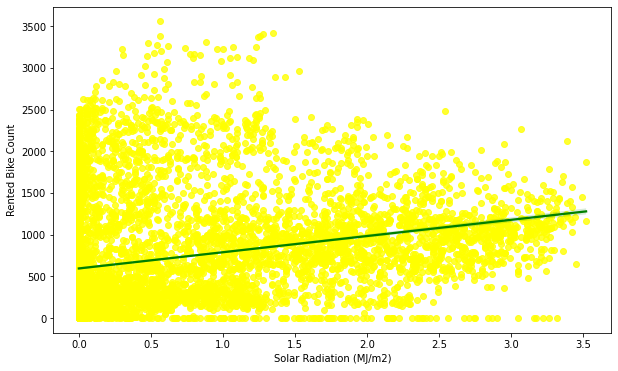

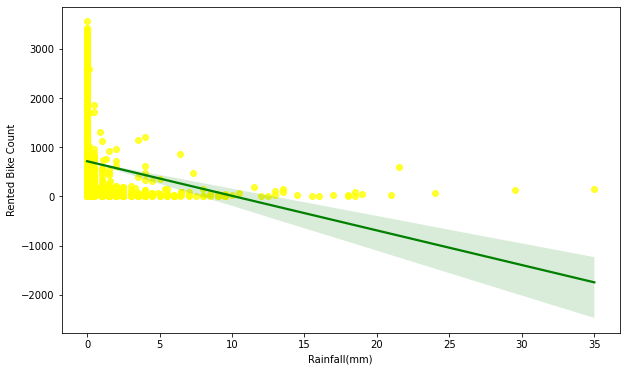

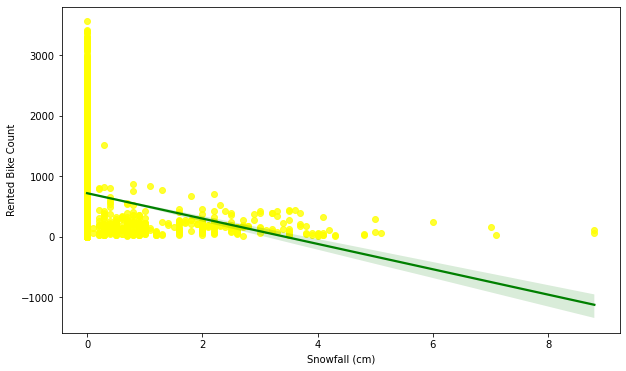

In [17]:
# #printing the regression plot for all the numerical features
for col in num_columns:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=data[col],y=data['Rented Bike Count'],scatter_kws={"color": 'yellow'}, line_kws={"color": "green"})

In [54]:
df = data.copy(deep=True)

In [67]:
#Rename the complex columns name
df= df.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'})

In [56]:
df.head()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,year,month_short,day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,Jan,Thursday
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,Jan,Thursday
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,Jan,Thursday
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,Jan,Thursday
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,Jan,Thursday


**Label encoding and onehot encoding and dummies**

In [68]:
df = pd.get_dummies(df,columns=['Functioning_Day'],prefix= 'dmy')

In [28]:
df.head(7000)

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,month_short,weekday_filter,dmy_No,dmy_Yes
0,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Jan,0,0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Jan,0,0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Jan,0,0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Jan,0,0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Jan,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,0,11,24.1,46,2.1,1678,11.7,2.03,0.0,0.0,Autumn,No Holiday,Sep,0,1,0
6996,0,12,24.7,43,1.8,1809,11.2,1.75,0.0,0.0,Autumn,No Holiday,Sep,0,1,0
6997,0,13,25.6,40,2.5,1704,10.9,2.18,0.0,0.0,Autumn,No Holiday,Sep,0,1,0
6998,0,14,26.1,37,2.3,1749,10.2,1.92,0.0,0.0,Autumn,No Holiday,Sep,0,1,0


In [69]:
df = pd.get_dummies(df,columns=['Holiday'])

In [32]:
df

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,month_short,weekday_filter,dmy_No,dmy_Yes,Holiday_Holiday,Holiday_No Holiday
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,Jan,0,0,1,0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,Jan,0,0,1,0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,Jan,0,0,1,0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,Jan,0,0,1,0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,Jan,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,Nov,0,0,1,0,1
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,Nov,0,0,1,0,1
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,Nov,0,0,1,0,1
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,Nov,0,0,1,0,1


In [71]:
# for the dummy columns that is created from Functioning_Day and Holiday column one of each category can be deleeted.
# renaming the dummy columns for clarity.
df.drop(columns=['Holiday_Holiday','dmy_No','month_short'],axis=1,inplace=True)

KeyError: ignored

In [34]:
df.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,weekday_filter,dmy_Yes,Holiday_No Holiday
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,0,1,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,0,1,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,0,1,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,0,1,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,0,1,1


In [41]:
df.Seasons.value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [72]:
df= df.rename(columns={'dmy_Yes':'Functionig_day','Holiday_No Holiday':'No Holiday'})

In [74]:
df

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,year,day,Functionig_day,No Holiday
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,2017,Thursday,1,1
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,2017,Thursday,1,1
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,2017,Thursday,1,1
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,2017,Thursday,1,1
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,2017,Thursday,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,2018,Friday,1,1
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,2018,Friday,1,1
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,2018,Friday,1,1
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,2018,Friday,1,1


In [75]:
df.drop(columns=['Date','year','day'],axis=1,inplace=True)

In [76]:
df.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Functionig_day,No Holiday
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,1,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,1,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,1,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,1,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,1,1


In [77]:
order_label = {"Spring":1,"Summer":2,"Autumn":3,"Winter":4}
df['Season_label']= df['Seasons'].map(order_label)

In [79]:
df.drop(columns=['Seasons'],axis=1,inplace=True)

In [81]:
df

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Functionig_day,No Holiday,Season_label
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,1,4
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,1,4
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1,1,4
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1,1,4
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,1,1,3
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,1,1,3
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,1,1,3
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,1,1,3


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented_Bike_Count      8760 non-null   int64  
 1   Hour                   8760 non-null   int64  
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   Wind_speed             8760 non-null   float64
 5   Visibility             8760 non-null   int64  
 6   Dew_point_temperature  8760 non-null   float64
 7   Solar_Radiation        8760 non-null   float64
 8   Rainfall               8760 non-null   float64
 9   Snowfall               8760 non-null   float64
 10  Functionig_day         8760 non-null   uint8  
 11  No Holiday             8760 non-null   uint8  
 12  Season_label           8760 non-null   int64  
dtypes: float64(6), int64(5), uint8(2)
memory usage: 770.0 KB
